In [26]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns



In [4]:
df =  pd.read_csv('car_price.csv')

### data cleaning 

In [5]:
df.tail(300)

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,engine,Seats,Manufacture
5212,5212,Hyundai Venue SX Dual Tone Turbo BSIV,9.50 Lakh,"55,000 kms",Petrol,Manual,2nd Owner,1956 cc,5 Seats,3/26/2014
5213,5213,Hyundai i10 Magna,5 Lakh,"58,000 kms",Petrol,Manual,1st Owner,1497 cc,5 Seats,3/27/2014
5214,5214,Maruti Wagon R LXI,5 Lakh,"68,000 kms",Petrol,Manual,1st Owner,998 cc,5 Seats,3/28/2014
5215,5215,Chevrolet Sail LS ABS,7.50 Lakh,"76,800 kms",Diesel,Manual,1st Owner,999 cc,5 Seats,3/29/2014
5216,5216,Maruti Swift Dzire AMT ZDI Plus,7.57 Lakh,"68,477 kms",Diesel,Automatic,2nd Owner,1451 cc,5 Seats,3/30/2014
...,...,...,...,...,...,...,...,...,...,...
5507,5507,BMW X1 sDrive 20d xLine,28.90 Lakh,"45,000 kms",Diesel,Automatic,1st Owner,2995 cc,7 Seats,1/15/2015
5508,5508,BMW M Series M4 Coupe,64.90 Lakh,"29,000 kms",Petrol,Automatic,2nd Owner,1968 cc,5 Seats,1/16/2015
5509,5509,Jaguar XF 2.2 Litre Luxury,13.75 Lakh,"90,000 kms",Diesel,Automatic,2nd Owner,2755 cc,5 Seats,1/17/2015
5510,5510,BMW 7 Series 730Ld,29.90 Lakh,"79,000 kms",Diesel,Automatic,3rd Owner,2967 cc,6 Seats,1/18/2015


In [6]:
def convert_price(price_str):
    # Ensure the input is a string
    price_str = str(price_str).replace(',', '').strip()
    
    if 'Lakh' in price_str:
        # Remove 'Lakh' and convert to float, then multiply by 100 (1 Lakh = 100 Thousand)
        return float(price_str.replace('Lakh', '').strip()) * 100
    elif 'Crore' in price_str:
        # Remove 'Crore' and convert to float, then multiply by 10,000 (1 Crore = 10,000 Thousand)
        return float(price_str.replace('Crore', '').strip()) * 10000
    else:
        # If neither 'Lakh' nor 'Crore' is found, return the value as is (assumed to be in thousands)
        return float(price_str)

# Apply the conversion function to each element in the DataFrame column
df['car_prices_in_rupee'] = df['car_prices_in_rupee'].apply(convert_price)


In [7]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5512 entries, 0 to 5511
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           5512 non-null   int64  
 1   car_name             5505 non-null   object 
 2   car_prices_in_rupee  5508 non-null   float64
 3   kms_driven           5506 non-null   object 
 4   fuel_type            5508 non-null   object 
 5   transmission         5499 non-null   object 
 6   ownership            5506 non-null   object 
 7   engine               5493 non-null   object 
 8   Seats                5502 non-null   object 
 9   Manufacture          5487 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 430.8+ KB


In [8]:
# Function to clean and convert the 'kms_driven' column
def clean_and_convert_kms(value):
    try:
        # Ensure the input is a string and remove commas and extra whitespace
        value_str = str(value).replace(',', '').strip()
        
        # Remove 'kms' and convert to float
        return float(value_str.replace('kms', '').strip())
    except ValueError:
        # Handle cases where conversion fails
        return None

# Apply the cleaning and conversion function to the 'kms_driven' column
df['kms_driven'] = df['kms_driven'].apply(clean_and_convert_kms)


In [9]:
df['Manufacture'] = pd.to_datetime(df['Manufacture'])

In [10]:
 df['Seats'] = df['Seats'].str.replace('Seats', '').str.strip()

In [11]:
df['company_name'] = df['car_name'].str.split(n=1).str[0]

In [12]:
df['car_name'] = df['car_name'].str.split(' ', n=1).str[1]

In [49]:
df['Year'] = df['Manufacture'].dt.year

In [13]:
df.columns



Index(['Unnamed: 0', 'car_name', 'car_prices_in_rupee', 'kms_driven',
       'fuel_type', 'transmission', 'ownership', 'engine', 'Seats',
       'Manufacture', 'company_name'],
      dtype='object')

In [14]:
df = df [['Unnamed: 0', 'company_name', 'car_name', 'car_prices_in_rupee', 'kms_driven',
       'fuel_type', 'transmission', 'ownership', 'engine', 'Seats',
       'Manufacture']]

In [50]:
df.head()

,Unnamed: 0,company_name,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,engine,Seats,Manufacture,Year
0,0,Jeep,Compass 2.0 Longitude Option BSIV,1003.0,86226.0,Diesel,Manual,1st Owner,1956 cc,5,2018-01-07,2018
1,1,Renault,Duster RXZ Turbo CVT,1283.0,13248.0,Petrol,Automatic,1st Owner,1330 cc,5,2018-01-08,2018
2,2,Toyota,Camry 2.5 G,1640.0,60343.0,Petrol,Automatic,1st Owner,2494 cc,5,2018-01-09,2018
3,3,Honda,Jazz VX CVT,777.0,26696.0,Petrol,Automatic,1st Owner,1199 cc,5,2018-01-10,2018
4,4,Volkswagen,Polo 1.2 MPI Highline,515.0,69414.0,Petrol,Manual,1st Owner,1199 cc,5,2018-01-11,2018


In [16]:
df = df.dropna()

In [17]:
df['company_name'] = df['company_name'].astype(str)
df['car_name'] = df['car_name'].astype(str)

In [18]:
 df.to_csv('modified_car_dataset.csv', index=False)

In [19]:
df.isnull().sum()

Unnamed: 0             0
company_name           0
car_name               0
car_prices_in_rupee    0
kms_driven             0
fuel_type              0
transmission           0
ownership              0
engine                 0
Seats                  0
Manufacture            0
dtype: int64

In [20]:
df.dropna()

,Unnamed: 0,company_name,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,engine,Seats,Manufacture
0,0,Jeep,Compass 2.0 Longitude Option BSIV,1003.0,86226.0,Diesel,Manual,1st Owner,1956 cc,5,2018-01-07
1,1,Renault,Duster RXZ Turbo CVT,1283.0,13248.0,Petrol,Automatic,1st Owner,1330 cc,5,2018-01-08
2,2,Toyota,Camry 2.5 G,1640.0,60343.0,Petrol,Automatic,1st Owner,2494 cc,5,2018-01-09
3,3,Honda,Jazz VX CVT,777.0,26696.0,Petrol,Automatic,1st Owner,1199 cc,5,2018-01-10
4,4,Volkswagen,Polo 1.2 MPI Highline,515.0,69414.0,Petrol,Manual,1st Owner,1199 cc,5,2018-01-11
...,...,...,...,...,...,...,...,...,...,...,...
5507,5507,BMW,X1 sDrive 20d xLine,2890.0,45000.0,Diesel,Automatic,1st Owner,2995 cc,7,2015-01-15
5508,5508,BMW,M Series M4 Coupe,6490.0,29000.0,Petrol,Automatic,2nd Owner,1968 cc,5,2015-01-16
5509,5509,Jaguar,XF 2.2 Litre Luxury,1375.0,90000.0,Diesel,Automatic,2nd Owner,2755 cc,5,2015-01-17
5510,5510,BMW,7 Series 730Ld,2990.0,79000.0,Diesel,Automatic,3rd Owner,2967 cc,6,2015-01-18


In [21]:
df.shape

(5433, 11)

In [22]:
df.info('company_name')

<class 'pandas.core.frame.DataFrame'>
Index: 5433 entries, 0 to 5511
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           5433 non-null   int64         
 1   company_name         5433 non-null   object        
 2   car_name             5433 non-null   object        
 3   car_prices_in_rupee  5433 non-null   float64       
 4   kms_driven           5433 non-null   float64       
 5   fuel_type            5433 non-null   object        
 6   transmission         5433 non-null   object        
 7   ownership            5433 non-null   object        
 8   engine               5433 non-null   object        
 9   Seats                5433 non-null   object        
 10  Manufacture          5433 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 509.3+ KB


In [23]:
df['company_name'].dtypes

dtype('O')

In [24]:
## Data visualisation

In [25]:
df.head()

,Unnamed: 0,company_name,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,engine,Seats,Manufacture
0,0,Jeep,Compass 2.0 Longitude Option BSIV,1003.0,86226.0,Diesel,Manual,1st Owner,1956 cc,5,2018-01-07
1,1,Renault,Duster RXZ Turbo CVT,1283.0,13248.0,Petrol,Automatic,1st Owner,1330 cc,5,2018-01-08
2,2,Toyota,Camry 2.5 G,1640.0,60343.0,Petrol,Automatic,1st Owner,2494 cc,5,2018-01-09
3,3,Honda,Jazz VX CVT,777.0,26696.0,Petrol,Automatic,1st Owner,1199 cc,5,2018-01-10
4,4,Volkswagen,Polo 1.2 MPI Highline,515.0,69414.0,Petrol,Manual,1st Owner,1199 cc,5,2018-01-11


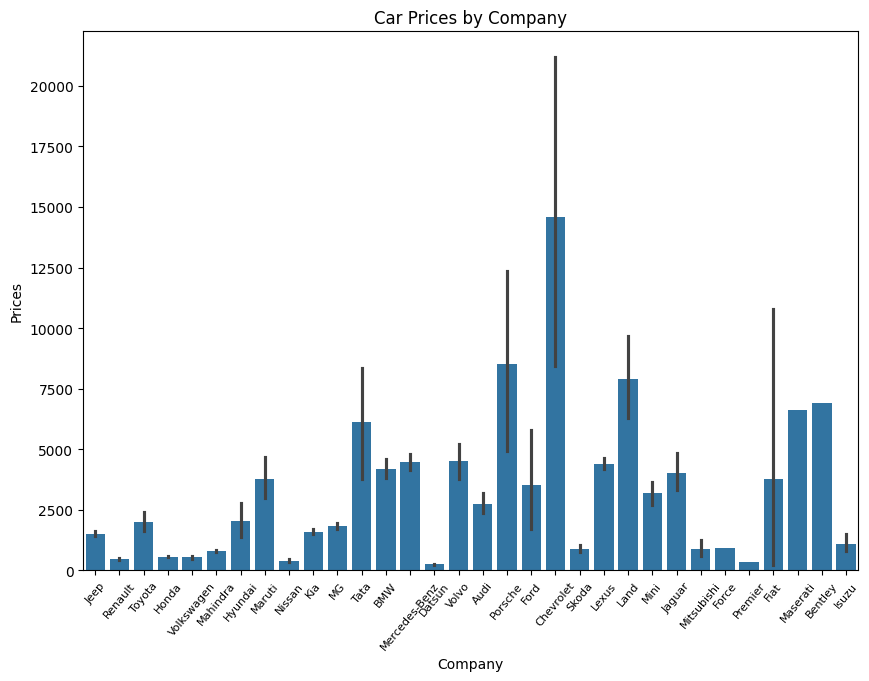

In [43]:
plt.figure(figsize=(10, 7))    # Set the figure size
sns.barplot(x='company_name', y='car_prices_in_rupee', data=df)
plt.xticks(rotation=50, fontsize=8)  # Rotate x-axis labels and set font size
plt.xlabel('Company')                # Label for the x-axis
plt.ylabel('Prices')                 # Label for the y-axis
plt.title('Car Prices by Company')   # Title of the plot
plt.show()

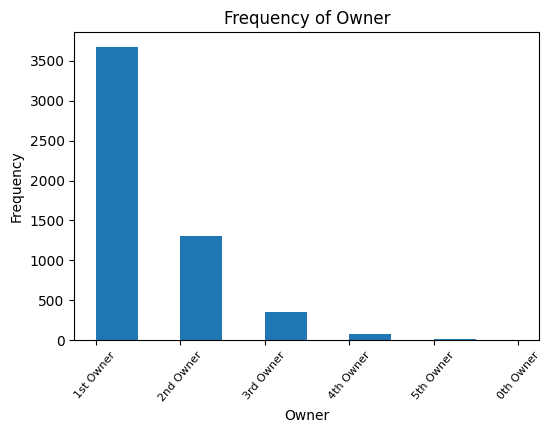

In [48]:
plt.figure(figsize=(6, 4))    # Set the figure size
plt.hist(x='ownership', data=df)
plt.xticks(rotation=50, fontsize=8)  # Rotate x-axis labels and set font size
plt.xlabel('Owner')                # Label for the x-axis
plt.ylabel('Frequency')                 # Label for the y-axis
plt.title('Frequency of Owner')   # Title of the plot
plt.show()

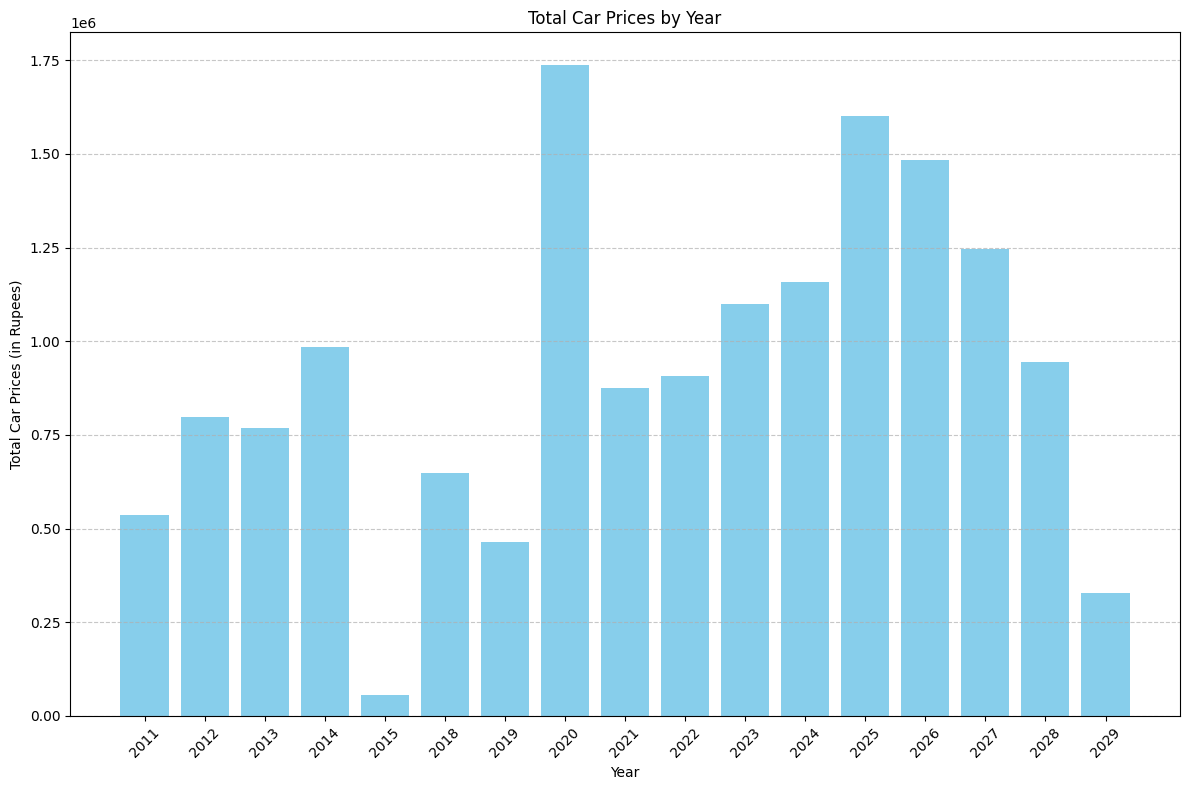

In [53]:
 yearly_data = df.groupby('Year')['car_prices_in_rupee'].sum().reset_index()

# Create the bar plot
plt.figure(figsize=(12, 8))  # Adjust the figure size if needed
plt.bar(yearly_data['Year'].astype(str), yearly_data['car_prices_in_rupee'], color='skyblue')

# Customize the plot
plt.xlabel('Year')                      # Label for the x-axis
plt.ylabel('Total Car Prices (in Rupees)')  # Label for the y-axis
plt.title('Total Car Prices by Year')  # Title of the plot
plt.xticks(rotation=45)                # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for better visualization

# Show the plot
plt.tight_layout()  # Adjust the layout to fit labels and titles
plt.show()

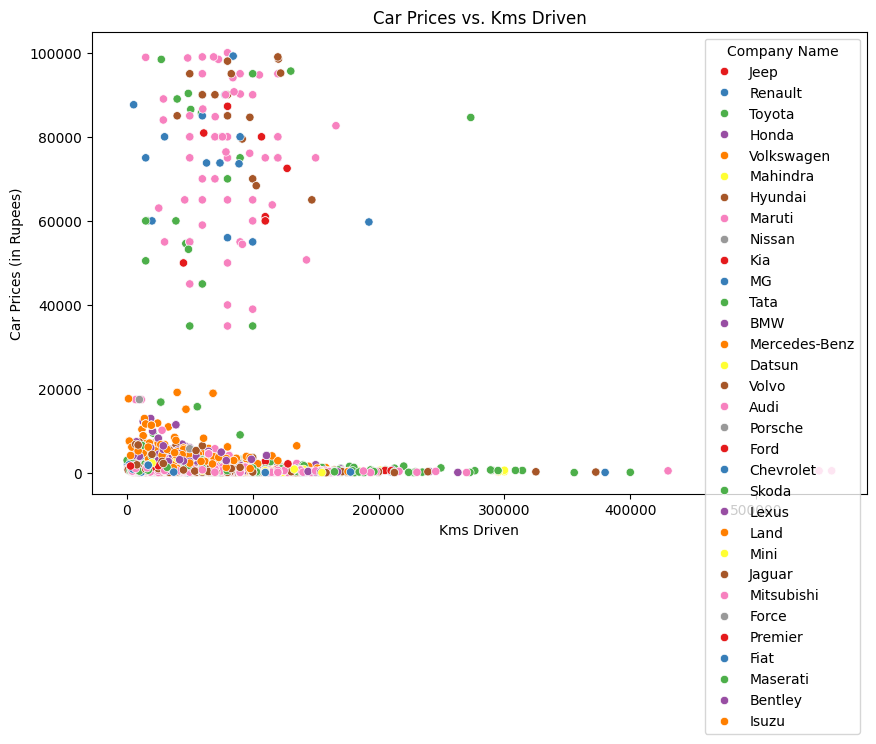

In [54]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='kms_driven', y='car_prices_in_rupee', data=df, hue='company_name', palette='Set1')
plt.xlabel('Kms Driven')
plt.ylabel('Car Prices (in Rupees)')
plt.title('Car Prices vs. Kms Driven')
plt.legend(title='Company Name')
plt.show()



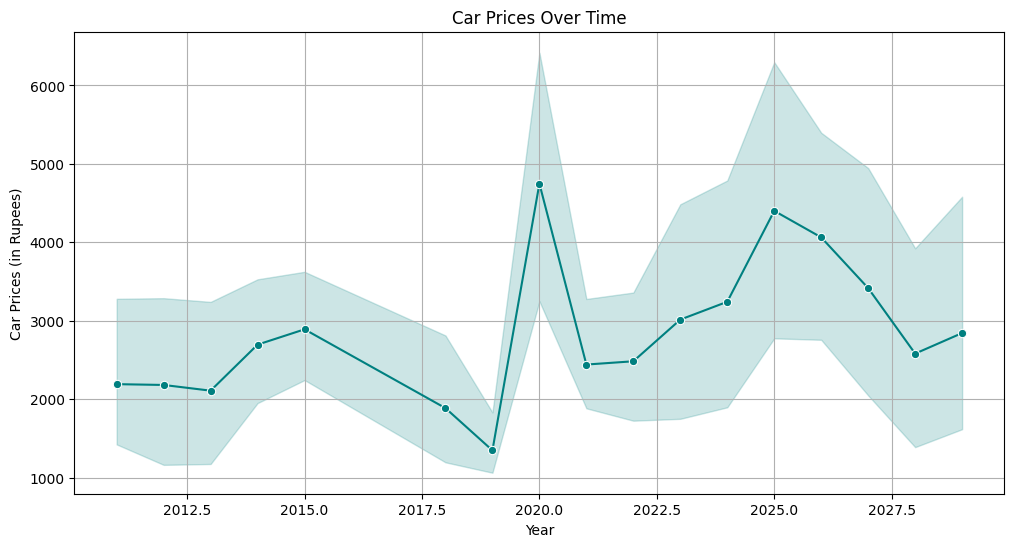

In [56]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='car_prices_in_rupee', data=df, marker='o', color='teal')
plt.xlabel('Year')
plt.ylabel('Car Prices (in Rupees)')
plt.title('Car Prices Over Time')
plt.grid(True)
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_9580\2974012661.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='fuel_type', y='car_prices_in_rupee', data=df, jitter=True, palette='pastel')


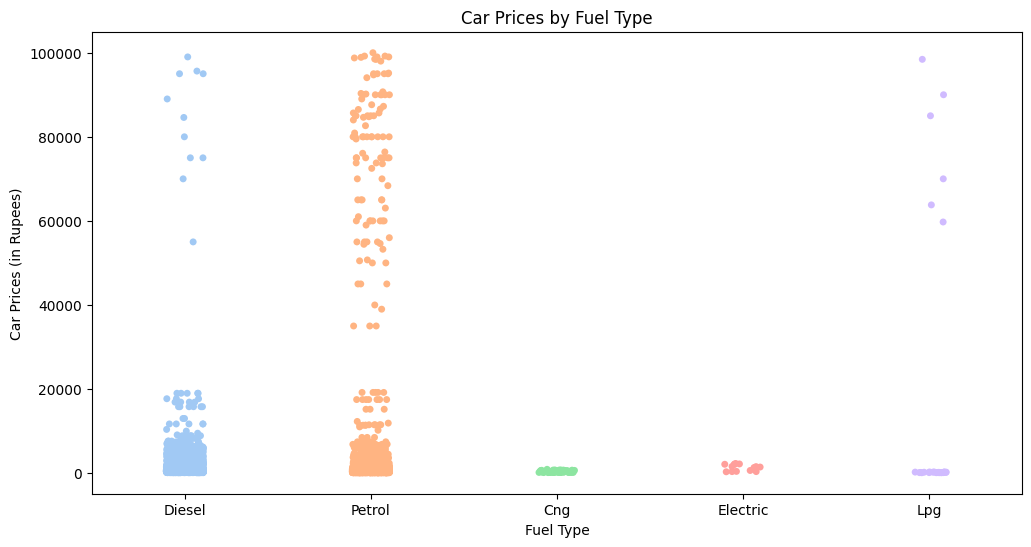

In [58]:
plt.figure(figsize=(12, 6))
sns.stripplot(x='fuel_type', y='car_prices_in_rupee', data=df, jitter=True, palette='pastel')
plt.xlabel('Fuel Type')
plt.ylabel('Car Prices (in Rupees)')
plt.title('Car Prices by Fuel Type')
plt.show()
